# Simulation proie-prédateur 

Wa-Tor est une simulation de type proie-prédateur. Dans une mer torique évoluent des thons (les proies) et des requins (les prédateurs). Les uns et les autres se déplacent et se reproduisent. Pour acquérir l'énergie suffisante à sa survie un requin doit manger un thon régulièrement. Un thon vit éternellement tant qu'il n'est pas mangé par un requin.

## La mer

La mer est représentée par une grille à deux dimensions torique. Chaque case a quatre voisines, une dans chacune des quatre directions cardinales (N, S, E O).
Chaque case de cette grille représente une zone de mer qui peut être soit vide, soit occupée par un thon ou un requin. Ci-dessous, completer la fonction creer_mer qui prand en arguments une taille et une valeur (nombre entier) et qui fabrique un tableau à deux dimensions de taille "taille" et  rempli avec la variable "valeur".
Par exemple : creer_mer(3) retourne [[0,0,0],[0,0,0],[0,0,0]]

In [91]:
taille=30
def creer_mer(taille,valeur):
    grille=[]
    MaLigne=[]
    for i in range(taille):
        MaLigne.append(valeur)
    for j in range(taille):
        #MaLigneBis=MaLigne.copy()
        MaLigneBis=list(MaLigne)
        grille.append(MaLigneBis)
    return grille
mer=creer_mer(taille,0)
#print(mer)

## Les poissons

Chaque requin est caractérisé par son temps de gestation et son énergie. Ces deux valeurs sont initialisées à une valeur initiale commune à tous les requins, appelées respectivement durée de gestation des requins et énergie des requins.

Pour chaque case de la mer, on mettra 0 s'il n'y a pas de poisson, 1 si il y a un thon et 2 s'il y a un requin. 
Completer le code ci-dessous afin de remplir la mer avec 10% de requin et 30% de thon.



In [92]:
import random
initialisation_requin=10
initialisation_thon=30
for i in range(taille):
    for j in range(taille):
        alea=random.random()
        if alea<=initialisation_requin/100.0:
            mer[i][j]=2 #requin
        if alea > initialisation_requin/100.0 and alea<=initialisation_requin/100.0+initialisation_thon/100.0:
            mer[i][j]=1 #thon
        if alea>initialisation_requin/100.0+initialisation_thon/100.0:
             mer[i][j]=0 #rien

### Les thons

Chaque thon est caractérisé par son temps de gestation. Ce temps est initialisé à une valeur initiale commune à tous les thons, appelée durée de gestation des thons. 
On définie une variable gestation_thon égale à 2.
Creer une grille (grille_gestation_thon) où toutes les cases sont égale au temps de gestation du thon.

In [93]:
gestation_thon=2
grille_gestation_thon=creer_mer(taille,gestation_thon)

### Les requins

Chaque requin est caractérisé par son temps de gestation et son énergie. Ces deux valeurs sont initialisées par les varable gestation_requin et energie_requin.
Creer deux grilles (grille_gestation_requin et  grille_energie_requin) où toutes les cases sont respectivement égales au temps de gestation du requin et à la variable energie.

In [94]:
gestation_requin=4
energie_requin=3
grille_gestation_requin=creer_mer(taille,gestation_requin)
grille_energie_requin=creer_mer(taille,energie_requin)
#print(grille_gestation_requin)
#print(grille_energie_requin)

### Mouvements

#### Préparation

Créer une focntion qui prend en parametre les coordonnées d'une case  (la
coordonnée (0,0) étant la case en haut à gauche)et qui teste si la case est libre  c'est à dire inocuppée par une poisson)

In [95]:
def est_libre(x,y):
    return  mer[x][y]==0
#print(est_libre(0,2))

Créer une fonction prend en parametre les coordonnées d'une case et  qui retourne la liste des cases libres ( autour de cette case. Attention la grille est torique. Explication : 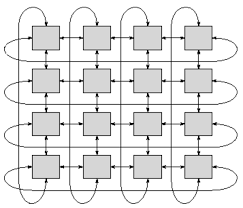

In [96]:
def liste_cases_voisines_libre(x,y):
    liste=[]
    if est_libre((x-1)%taille,(y+1)%taille) :
        liste.append(((x-1)%taille,(y+1)%taille))
    if est_libre((x)%taille,(y+1)%taille) :
        liste.append(((x)%taille,(y+1)%taille))
    if est_libre((x+1)%taille,(y+1)%taille) :
        liste.append(((x+1)%taille,(y+1)%taille))
    if est_libre((x-1)%taille,(y)%taille) :
        liste.append(((x-1)%taille,(y)%taille))
    if est_libre((x+1)%taille,(y)%taille) :
        liste.append(((x+1)%taille,(y)%taille))
    if est_libre((x-1)%taille,(y-1)%taille) :
        liste.append(((x-1)%taille,(y-1)%taille))
    if est_libre((x)%taille,(y-1)%taille) :
        liste.append(((x)%taille,(y-1)%taille))
    if est_libre((x+1)%taille,(y-1)%taille) :
        liste.append(((x+1)%taille,(y-1)%taille))
    return liste
#print(liste_cases_voisines_libre(0,0))

Créer une fonction prend en parametre les coordonnées d'une case et  qui retourne aléatoirement une case voisine  libre s'il y en a une.

In [97]:
import random
def choix_cases_voisines_libres(x,y):
    liste=liste_cases_voisines_libre(x,y)
    if liste != []:
        random.shuffle(liste) #on mélenge la liste
        return liste[0] # on prend le premier élement
    else:
        return [] # cas où il n'y a pas de voisin
#print(choix_cases_voisines_libres(0,0))

Créer une fonction prend en parametre les coordonnées d"une case est qui teste si la case est occupée par un thon.

In [98]:
def est_thon(x,y):
    return mer[y][x]==1
#print(est_thon(1,0))

Créer une fonction prend en parametre les coordonnées d"une case est qui teste si la case est occupée par un requin.

In [99]:
def est_requin(x,y):
    return mer[y][x]==2

####  Mouvement des thons

Un thon applique le comportement suivant :
- Déplacement 
    Le thon choisit aléatoirement une case libre parmi ses voisines.
    
    S'il en existe une, le thon se déplace vers cette case. Il reste sur place sinon.
- Reproduction
    Le temps de gestation du thon est diminué de 1. 
    Si ce temps arrive à 0, le thon donne naissance à un nouveau thon qui nait sur la case qu'il vient de quitter s'il s'est déplacé. 
    Sinon aucun thon ne nait. Le temps de gestation est remis à sa valeur initiale.

Compléter la fonction ci-dessous qui simimule le deplacement d'un thon situé dans la case (x,y).
Pensez à mettre à jour la grille de gestation des thons. (grille_gestation_thon)

In [100]:
def deplacer_thon(x,y):
    tmp=nb_thon()
    case_libre=choix_cases_voisines_libres(x,y)
    gestation=grille_gestation_thon[y][x]-1
    if case_libre !=[]:
        mer[y][x]=0#suppression du thon
        mer[case_libre[0]][case_libre[1]]=1#deplacement du thon
        grille_gestation_thon[case_libre[0]][case_libre[1]]=gestation #gestation
        if  gestation==0:
            mer[y][x]=1
            grille_gestation_thon[y][x]=gestation_thon #gestation du bébé thon au max
            grille_gestation_thon[case_libre[0]][case_libre[1]]=gestation_thon #reinitialisation de la gestation du thon parent
    else:#pas de place autour du thon donc pas dde naissance
        if  gestation==0:
            grille_gestation_thon[y][x]=gestation_thon
        #naissance
#    return mer
#print(mer)
#print(deplacer_thon(7,1))

Vous avez dû maintenant réaliser que dans une liste, on commence à compter à 0 et non à 1, contrairement à ce que l'on fait dans la vraie vie. On appelle "indice" d'un élément dans une liste sa position moins 1. Par exemple l'indice de l'élément 3 dans liste est 0, car 3 est le premier élément. Quel est l'indice de l'élément 78?


On peut aussi connaitre la longueur de la liste grace à la fonction len()



#### Mouvement des requins




Un requin applique le comportement suivant :


- Energie Le requin perd un point d'énergie.

- Déplacement Le requin choisit aléatoirement parmi ses voisines une case occupée par un thon. S'il en existe une, le requin se déplace vers cette case et mange le thon. Son niveau d'énergie est alors remis à sa valeur initiale. Sinon il cherche à se déplacer vers une case voisine vide choisie au hasard. Il reste sur place s'il n'y en a aucune.

- Mort Si le niveau d'énergie du requin est à 0, il meurt. Dans ce cas l'étape suivante n'a évidemment pas lieu.

- Reproduction Le temps de gestation du requin est diminué de 1. Si ce temps arrive à 0, il donne naissance à un nouveau requin sur la case qu'il vient de quitter s'il s'est déplacé, sinon aucun reuqin ne nait. Son temps de gestation est remis à sa valeur initiale.

Créer une fcontion prend en parametre les coodonnées d'une case est qui retourne la liste des cases occupées par un thon.

In [101]:
def liste_cases_voisines_thon(x,y):
    liste=[]
    if est_thon((x-1)%taille,(y+1)%taille) :
        liste.append(((x-1)%taille,(y+1)%taille))
    if est_thon((x)%taille,(y+1)%taille) :
        liste.append(((x)%taille,(y+1)%taille))
    if est_thon((x+1)%taille,(y+1)%taille) :
        liste.append(((x+1)%taille,(y+1)%taille))
    if est_thon((x-1)%taille,(y)%taille) :
        liste.append(((x-1)%taille,(y)%taille))
    if est_thon((x+1)%taille,(y)%taille) :
        liste.append(((x+1)%taille,(y)%taille))
    if est_thon((x-1)%taille,(y-1)%taille) :
        liste.append(((x-1)%taille,(y-1)%taille))
    if est_thon((x)%taille,(y-1)%taille) :
        liste.append(((x)%taille,(y-1)%taille))
    if est_thon((x+1)%taille,(y-1)%taille) :
        liste.append(((x+1)%taille,(y-1)%taille))
    return liste

Créer une fonction prend en parametre les coordonnées d'une case et  qui retourne aléatoirement une case voisine occupée par un thon s'il y en a une.

In [102]:
def choix_cases_voisines_thon(x,y):
    liste=liste_cases_voisines_thon(x,y)
    random.shuffle(liste)
    if liste != []:
        return liste[0]
    else:
        return []

Créer une focntion qui prend en parametrs les coordonnées d'une case ossupée par un requin est qui similue son déplacement. Pensez à mettre à jour la grille_gestation_requin et la grille_energie_requin.


In [103]:
def deplacer_requin(x,y):
    energie=grille_energie_requin[y][x]-1#perte d'energie
    gestation=grille_gestation_requin[y][x]-1#gestation diminuée de 1
    case_thon=choix_cases_voisines_thon(x,y)#recherhce d'un thon
    tmp=nb_thon()
    if case_thon!=[]:
        #on deplace le requin
        mer[y][x]=0
        mer[case_thon[1]][case_thon[0]]=2
        #gestation_requin
        grille_gestation_requin[case_thon[1]][case_thon[0]]=gestation
        #energie remise au max
        grille_energie_requin[case_thon[1]][case_thon[0]]=energie_requin
        #reinitialisation_case
        #reproduction
        if gestation==0:
            #le bébé requin
            mer[y][x]=2
            grille_gestation_requin[y][x]=gestation_requin
            grille_energie_requin[y][x]=energie_requin
            grille_gestation_requin[case_thon[1]][case_thon[0]]=gestation_requin #reinitialisation de la gestation du thon parent
    else:#pas de thon à manger
        case_vide=choix_cases_voisines_libres(x,y)
        if case_vide != []:
            #deplacement
            mer[y][x]=0
            mer[case_vide[1]][case_vide[0]]=2
            grille_gestation_requin[case_vide[1]][case_vide[0]]=gestation #gestation
            grille_energie_requin[case_vide[1]][case_vide[0]]=energie #energie
            #reinitialisation_case
            if  energie==0:#mort
                mer[case_vide[1]][case_vide[0]]=0
                mer[y][x]=0
            else: #reproduction
                if gestation==0:
                    mer[y][x]=2 #bébé requin
                    grille_gestation_requin[y][x]=gestation_requin
                    grille_energie_requin[y][x]=energie_requin
                    grille_gestation_requin[case_vide[1]][case_vide[0]]=gestation_requin #reinitialisation de la gestation du requin parent
        else:
            grille_gestation_requin[y][x]=gestation
            if gestation==0:
                grille_gestation_requin[y][x]=gestation_requin
    return mer

  # Simulation

Créer une fcontion qui compte le nombre de requin présent dans la mer.

In [104]:
def nb_thon():
    thon=0
    for i in range(taille):
        for j in range(taille):
            if mer[i][j]==1:
                thon=thon+1
    return thon

Créer une fcontion qui compte le nombre de requin présent dans la mer.

In [105]:
def nb_requin():
    requin=0
    for i in range(taille):
        for j in range(taille):
            if mer[i][j]==2:
                requin=requin+1
    return requin

In [106]:
import numpy
from matplotlib import pylab
print('ok')

ok


In [107]:
T=[nb_thon()/(taille*taille*1.0)*100.0] #  de thon présents
R=[nb_requin()/(taille*taille*1.0)*100.0] # de requin présents
A=[0]
for j in range(1000):
    for i in range(100):
        nb1=random.randint(0,taille-1)
        nb2=random.randint(0,taille-1)
        if est_thon(nb1,nb2):
            deplacer_thon(nb1,nb2)
        if est_requin(nb1,nb2):
            deplacer_requin(nb1,nb2)
    T.append(nb_thon()/(taille*taille*1.0)*100.0)
    R.append(nb_requin()/(taille*taille*1.0)*100.0)
    A.append(j*i)

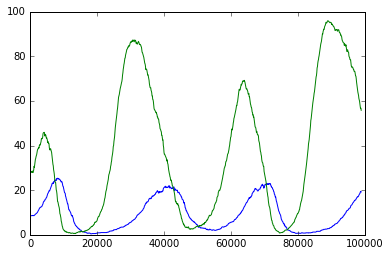

In [108]:
pylab.plot(A, R)
pylab.plot(A, T)
pylab.show()
#pylab.plot(R, T)
#pylab.show()